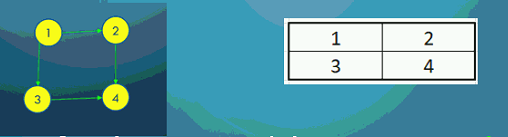

# Problem Solving Agent

In [16]:
import random
class environment (object):
    def __init__(self):
        self.location = ["1", "2", "3", "4"] #list
        self.move = ["L", "R", "U", "D"]
        self.path = {"1R":"2", "1L":"W", "1U":"W", "1D":"3",
                    "2R": "W", "2L":"1", "2U":"W", "2D":"4",
                    "3R":"4", "3L":"W", "3U":"1", "3D":"W",
                    "4R":"W", "4L":"3", "4U":"2", "4D":"W"} #dictionary W - Wall
        self.journey = []

class agent(environment):
    def __init__(self, environment):
        self.agentlocation = random.choice(environment.location)
        print("agentlocation", self.agentlocation)
        environment.journey.append(self.agentlocation[0]) #append - adds info into a list
        while (self.agentlocation[0] != "4"):
            toMove = self.choosepath(self.agentlocation, environment)
            self.agentlocation = environment.path[toMove]
            environment.journey.append(self.agentlocation[0])
            # environment.journey.append("4")
            print("Journey: ", environment.journey)
            
            
    def choosepath (self, agentlocation, environment):
        i = random.choice(environment.move) # move
        j = str(agentlocation[0] + i)#where it will end up
        print("Suggested path", j)
        while (environment.path[j] == "W"):
                i = random.choice(environment.move) # move
                j = str(agentlocation[0] + i)#where it will end up
                print("Suggested path", j)
        print("Selected path", j)
        return j
                        
e1 = environment()
a1 = agent(e1) #inheritance
                
        
        

agentlocation 2
Suggested path 2U
Suggested path 2D
Selected path 2D
Journey:  ['2', '4']


# Uninformed search

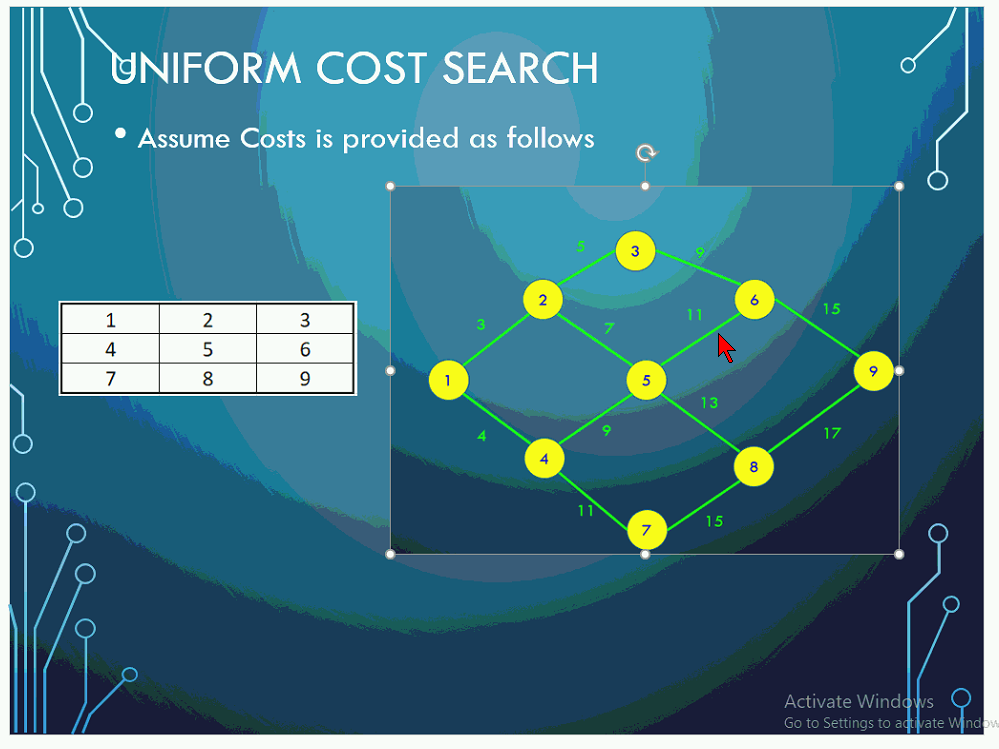

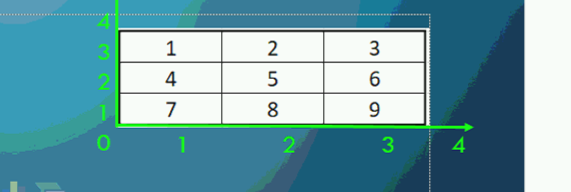

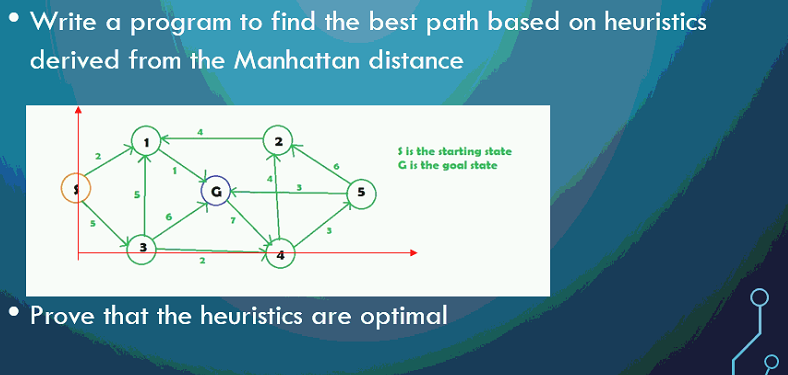

In [8]:
import operator

class environment():
    mygraph = {"1":set(["2", "4"]), #locations next to it
              "2":set(["1", "5", "3"]),
              "3":set(["2", "6"]),
              "4":set(["1", "5", "7"]),
              "5":set(["2", "4", "6", "8"]),
              "6":set(["3", "5", "9"]),
              "7":set(["4", "8"]),
              "8":set(["7", "5", "9"]),
              "9":set(["6", "8"])} #list converted to set - how to implement a graph - allows graph algorithms
    cost = {str(["1","2"]):"3", str(["1","4"]):"5", 
            str(["2","3"]):"5", str(["2","1"]):"3", str(["2","5"]):"7",
            str(["3","2"]):"5", str(["3","6"]):"9",
            str(["4","1"]):"5", str(["4","5"]):"9",str(["4","7"]):"11",
            str(["5","2"]):"7", str(["5","4"]):"9",str(["5","8"]):"13", str(["5","6"]):"11",
            str(["6","3"]):"9", str(["6","5"]):"11",str(["6","9"]):"15",
            str(["7","4"]):"11", str(["7","8"]):"15",
            str(["8","7"]):"15", str(["8","5"]):"13",str(["8","9"]):"17",
            str(["9","6"]):"15", str(["9","8"]):"17"}
    
    myheuristics = {"1": ["1", "3"],
                   "2": ["2", "3"],
                   "3": ["3", "3"],
                   "4": ["1", "2"],
                   "5": ["2", "2"],
                   "6": ["3", "2"],
                   "7": ["1", "1"],
                   "8": ["2", "1"],
                   "9": ["3", "1"]}
    start = "1"
    goal = "8"
    
class agent(environment):
    def dfs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        while stack:
            (vertex, path) = stack.pop()
            
            for next in graph[vertex] - set(path):
                if next==goal:
                    p.append(path+[next])
                else:
                    stack.append((next, path + [next]))
                    
        return p

    def bfs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        while stack:
            (vertex, path) = stack.pop(0) #pop - removes things from a stack
            print("stack", stack)
            print("vertex and path", vertex, path)
            for next in graph[vertex] - set(path):
                if next==goal:
                    p.append(path+[next])
                    return p
                else:
                    stack.append((next, path + [next]))
                    
        return p
    def getcost(path):
        i = 0
        pathcost = 0
        while i < len(path) - 1:
            l = []
            l.append(path[i])
            l.append(path[i + 1])
            pathcost = pathcost + int (environment.cost[str(l)])
            i += 1
        return pathcost
    
    def ucs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        leastcost = 1000
        while stack:
            (vertex, path) = stack.pop()
            for next in graph[vertex] - set(path):
                if next==goal:
                    pathcost = agent.getcost(path+[next])
                    print("path", path+[next], "pathcost", pathcost)
                    if pathcost < leastcost:
                        leastcost = pathcost
                        p = path+[next]
                else:
                    stack.append((next, path + [next]))
                    
        return p
    
    def geth(vertex, goal):
        v = []
        g = []
        for i in environment.myheuristics[vertex]:
            v.append(int(i))
        for i in environment.myheuristics[goal]:
            g.append(int(i))
        heuristics = abs(v[0] - g[0]) + abs(v[1] - g[1])
       
        return heuristics
        
    
    def gbfs(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbour = graph[start]
            h = {} #empty dictionary
            for i in neighbour.difference(p):
                h [i] = agent.geth(i, goal) #will get heuristics
            sortedh = sorted(h.items(), key = operator.itemgetter(1)) #function to sort data
            x = next(iter(sortedh[0]))
            p.append(x)
            if x == goal:
                return p
            else:
                start = x
                
    def astar(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbour = graph[start]
            h = {} #empty dictionary
            for i in neighbour.difference(p):
                h [i] = agent.geth(i, goal) + agent.getcost(i) #will get heuristics and cost
            sortedh = sorted(h.items(), key = operator.itemgetter(1)) #function to sort data
            x = next(iter(sortedh[0]))
            p.append(x)
            if x == goal:
                return p
            else:
                start = x
    
    def __init__(self, environment):
        print("dfs", self.dfs(environment.mygraph, environment.start, environment.goal)) # calls the dfs
        print("bfs", self.bfs(environment.mygraph, environment.start, environment.goal)) # calls the bfs
        print("ucs", self.ucs(environment.mygraph, environment.start, environment.goal))
        print("gbfs", self.gbfs(environment.mygraph, environment.start, environment.goal))
        print("astar", self.astar(environment.mygraph, environment.start, environment.goal))
        
        
e1 = environment()
a1 = agent(e1)
    

dfs [['1', '4', '7', '8'], ['1', '4', '5', '8'], ['1', '4', '5', '6', '9', '8'], ['1', '4', '5', '2', '3', '6', '9', '8'], ['1', '2', '3', '6', '9', '8'], ['1', '2', '3', '6', '5', '8'], ['1', '2', '3', '6', '5', '4', '7', '8'], ['1', '2', '5', '8'], ['1', '2', '5', '4', '7', '8'], ['1', '2', '5', '6', '9', '8']]
stack []
vertex and path 1 ['1']
stack [('4', ['1', '4'])]
vertex and path 2 ['1', '2']
stack [('5', ['1', '2', '5']), ('3', ['1', '2', '3'])]
vertex and path 4 ['1', '4']
stack [('3', ['1', '2', '3']), ('5', ['1', '4', '5']), ('7', ['1', '4', '7'])]
vertex and path 5 ['1', '2', '5']
bfs [['1', '2', '5', '8']]
path ['1', '4', '7', '8'] pathcost 31
path ['1', '4', '5', '8'] pathcost 27
path ['1', '4', '5', '6', '9', '8'] pathcost 57
path ['1', '4', '5', '2', '3', '6', '9', '8'] pathcost 67
path ['1', '2', '3', '6', '9', '8'] pathcost 49
path ['1', '2', '3', '6', '5', '8'] pathcost 41
path ['1', '2', '3', '6', '5', '4', '7', '8'] pathcost 63
path ['1', '2', '5', '8'] pathcost 23

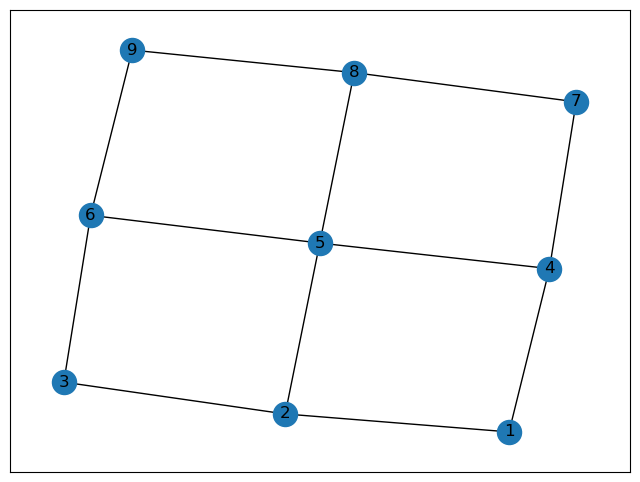

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
mygraph = {"1":set(["2", "4"]),
              "2":set(["1", "5", "3"]),
              "3":set(["2", "6"]),
              "4":set(["1", "5", "7"]),
              "5":set(["2", "4", "6", "8"]),
              "6":set(["3", "5", "9"]),
              "7":set(["4", "8"]),
              "8":set(["7", "5", "9"]),
              "9":set(["6", "8"])}

s = [] #point a
t = [] #point t
w = [] #weight of each line between two points
for k,v in mygraph.items(): #key and value(the value is another list of things)
    for y in v:
        s.append(k)
        t.append(y)
        w.append(1) #all will have the same weight of 1
df = pd.DataFrame({"source": s, "target": t, "weight":w})
g = nx.from_pandas_edgelist(df,source="source", target="target", edge_attr="weight")
#next is to specify the graph options - optional
goptions = [nx.draw_networkx, nx.draw_circular, nx.draw_random, nx.draw_shell, nx.draw_spring]
plt.figure(figsize = (8, 6))
goptions[0](g)


        

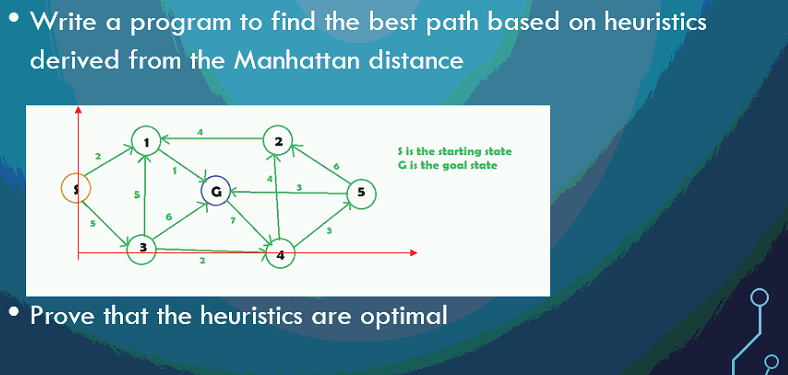

In [2]:
import operator

class environment():
    mygraph = {"S":set(["1", "3"]), #locations next to it
              "1":set(["G"]),
              "2":set(["1"]),
              "3":set(["1", "4", "G"]),
              "4":set(["2","5"]),
              "5":set(["2", "G"]),
              "G":set(["4"])}#list converted to set - how to implement a graph - allows graph algorithms
    cost = {str(["S","1"]):"2", str(["S","3"]):"5", 
            str(["1","G"]):"1",
            str(["2","1"]):"4",
            str(["3","1"]):"5", str(["3","4"]):"2",str(["3","G"]):"6",
            str(["4","2"]):"4", str(["4","5"]):"3",
            str(["5","2"]):"6", str(["5","G"]):"3",
            str(["G","4"]):"7"}
    
    myheuristics = {"S": ["0", "1"],
                   "1": ["1", "2"],
                   "2": ["3", "2"],
                   "3": ["1", "0"],
                   "4": ["3", "0"],
                   "5": ["4", "1"],
                   "G": ["2", "1"]}
    start = "S"
    goal = "G"
    
class agent(environment):
    def dfs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        while stack:
            (vertex, path) = stack.pop()
            
            for next in graph[vertex] - set(path):
                if next==goal:
                    p.append(path+[next])
                else:
                    stack.append((next, path + [next]))
                    
        return p

    def bfs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        while stack:
            (vertex, path) = stack.pop(0) #pop - removes things from a stack
            print("stack", stack)
            print("vertex and path", vertex, path)
            for next in graph[vertex] - set(path):
                if next==goal:
                    p.append(path+[next])
                    return p
                else:
                    stack.append((next, path + [next]))
                    
        return p
    def getcost(path):
        i = 0
        pathcost = 0
        while i < len(path) - 1:
            l = []
            l.append(path[i])
            l.append(path[i + 1])
            pathcost = pathcost + int (environment.cost[str(l)])
            i += 1
        return pathcost
    
    def ucs(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        leastcost = 1000
        while stack:
            (vertex, path) = stack.pop()
            for next in graph[vertex] - set(path):
                if next==goal:
                    pathcost = agent.getcost(path+[next])
                    print("path", path+[next], "pathcost", pathcost)
                    if pathcost < leastcost:
                        leastcost = pathcost
                        p = path+[next]
                else:
                    stack.append((next, path + [next]))
                    
        return p
    
    def geth(vertex, goal):
        v = []
        g = []
        for i in environment.myheuristics[vertex]:
            v.append(int(i))
        for i in environment.myheuristics[goal]:
            g.append(int(i))
        heuristics = abs(v[0] - g[0]) + abs(v[1] - g[1])
       
        return heuristics
        
    
    def gbfs(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbour = graph[start]
            h = {} #empty dictionary
            for i in neighbour.difference(p):
                h [i] = agent.geth(i, goal) #will get heuristics
            sortedh = sorted(h.items(), key = operator.itemgetter(1)) #function to sort data
            x = next(iter(sortedh[0]))
            p.append(x)
            if x == goal:
                return p
            else:
                start = x
                
    def astar(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbour = graph[start]
            h = {} #empty dictionary
            for i in neighbour.difference(p):
                h [i] = agent.geth(i, goal) + agent.getcost(i) #will get heuristics and cost
            sortedh = sorted(h.items(), key = operator.itemgetter(1)) #function to sort data
            x = next(iter(sortedh[0]))
            p.append(x)
            if x == goal:
                return p
            else:
                start = x
    
    def __init__(self, environment):
        print("dfs", self.dfs(environment.mygraph, environment.start, environment.goal)) # calls the dfs
        print("bfs", self.bfs(environment.mygraph, environment.start, environment.goal)) # calls the bfs
        print("ucs", self.ucs(environment.mygraph, environment.start, environment.goal))
        print("gbfs", self.gbfs(environment.mygraph, environment.start, environment.goal))
        print("astar", self.astar(environment.mygraph, environment.start, environment.goal))
        
        
e1 = environment()
a1 = agent(e1)
    

dfs [['S', '1', 'G'], ['S', '3', 'G'], ['S', '3', '1', 'G'], ['S', '3', '4', '5', 'G'], ['S', '3', '4', '5', '2', '1', 'G'], ['S', '3', '4', '2', '1', 'G']]
stack []
vertex and path S ['S']
stack [('1', ['S', '1'])]
vertex and path 3 ['S', '3']
bfs [['S', '3', 'G']]
path ['S', '1', 'G'] pathcost 3
path ['S', '3', 'G'] pathcost 11
path ['S', '3', '1', 'G'] pathcost 11
path ['S', '3', '4', '5', 'G'] pathcost 13
path ['S', '3', '4', '5', '2', '1', 'G'] pathcost 21
path ['S', '3', '4', '2', '1', 'G'] pathcost 16
ucs ['S', '1', 'G']
gbfs ['S', '3', 'G']
astar ['S', '3', 'G']
